In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import particlesim.api
import particlesim.helpers_for_tests
import particlesim.utils.xyz
import particlesim.utils.config_parser
import particlesim.utils.conversion

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_nacl(traj,left,right,num_na,traj_sample = -1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    last_na_pos = traj[traj_sample,:num_na,:]
    last_cl_pos = traj[traj_sample,num_na:,:]
    
    a =(last_na_pos <= right)*(last_na_pos >=left)
    a = a[:,0]*a[:,1]*a[:,2]
    small_box_na = last_na_pos[a]
    b = (last_cl_pos <= right)*(last_cl_pos >=left)
    b = b[:,0]*b[:,1]*b[:,2]
    
    small_box_cl = last_cl_pos[b]
    ax.scatter(small_box_na[:,0],small_box_na[:,1],small_box_na[:,2],c='r')
    ax.scatter(small_box_cl[:,0],small_box_cl[:,1],small_box_cl[:,2],c='b')
    ax.set_xlim([left,right])
    ax.set_ylim([left,right])
    ax.set_zlim([left,right])


## Config File:


In [3]:
# %load /home/simon/Dokumente/Uni/CompSci/compscie-mc/jupyter_notebooks/config/8_particle_nacl_rand.cfg
[general]
box-size = 12

[particle_class_1]
label = Natrium
type = Na
charge = 1
distribution = uniform
number = 4

[particle_class_2]
label = Chlor
type = Cl
charge = -1
distribution = uniform
number = 4


SyntaxError: can't assign to operator (<ipython-input-3-95ccd9ceb08c>, line 3)

In [4]:
creator = particlesim.utils.config_parser.ProblemCreator("/home/jaap/Dokumente/FU_berlin/WiSe_1617/compsci_wise_1617/compscie-mc/jupyter_notebooks/config/8_particle_nacl_rand.cfg")

In [5]:
system_config = creator.generate_problem()

In [6]:
sampler = particlesim.api.Sampler(system_config)

In [7]:
particlesim.utils.conversion.beta_to_kelvin(0.001)

503219.1485090949

In [8]:
len([0.1,1])

2

In [9]:
traj,pot = sampler.metropolis_sa(iteration_number=1000,step=0.01,beta=[0.1,1])

<IPython.core.display.Javascript object>


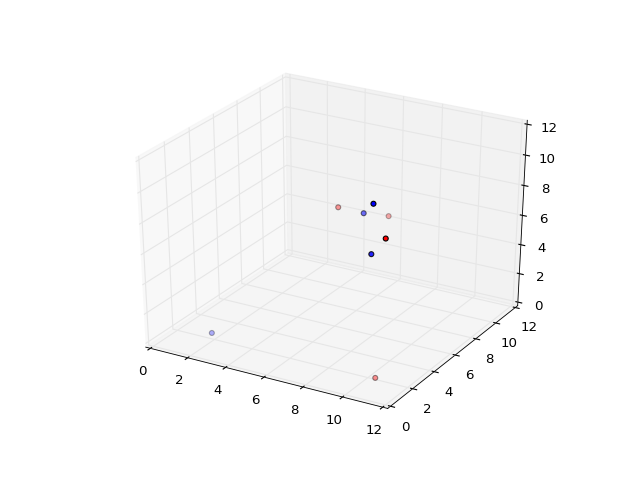

In [10]:
plot_nacl(traj=traj,left=0,right=12,num_na=4,traj_sample=-1)

In [35]:
system_config_2 = creator.generate_problem()

In [179]:
sys_conf_64 = create_system_conf_with_na_and_cl(100,100,12)

In [180]:
sampler2 = particlesim.api.Sampler(sys_conf_64)


In [244]:
iteration_number = 1000

<IPython.core.display.Javascript object>


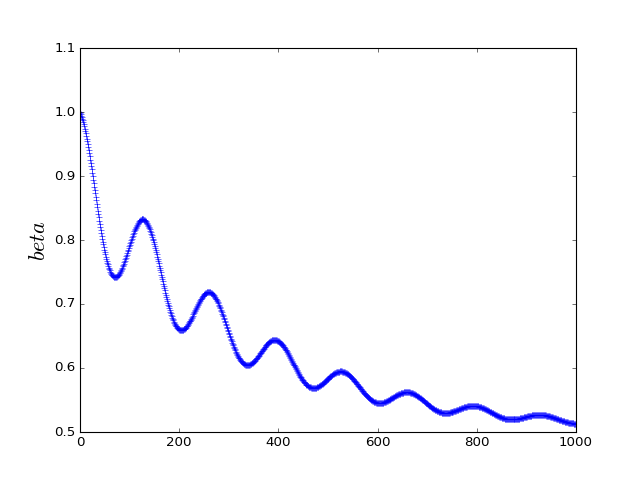

In [269]:
def beta_fct(start_beta,end_beta):
    x = np.linspace(0,np.pi,iteration_number)
    beta = 0.5*(0.8*np.exp(-x)+0.2*np.cos(15*x)*np.exp(-x))+ 0.2
    C=start_beta
    D=end_beta-C
    beta = D*np.exp(-x)*(0.8+0.2*np.cos(15*x))+C
    beta_2 = beta[::-1]
    plt.figure()
    plt.plot(beta,'+')
    plt.ylabel(r"$beta$", fontsize = 20)
    return beta_2
beta_2 = beta_fct(0.5,1.)

In [194]:
traj_2,pot_2 = sampler2.metropolis_sa(iteration_number=iteration_number,step=0.001,beta=beta_2)

<IPython.core.display.Javascript object>


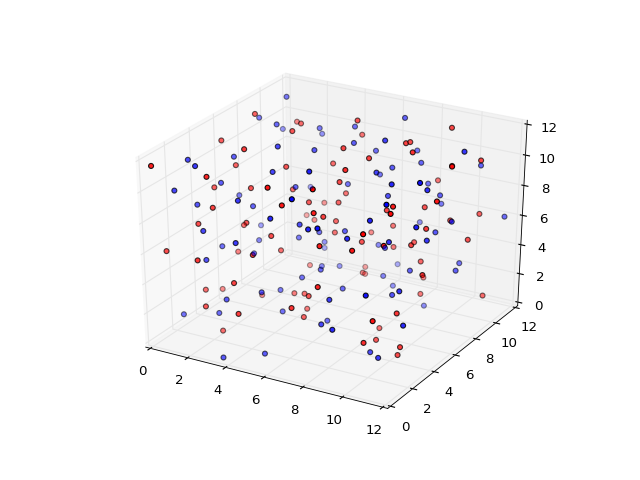

In [195]:
plot_nacl(traj=traj_2,left=0,right=12,num_na=100,traj_sample=-1)

<IPython.core.display.Javascript object>


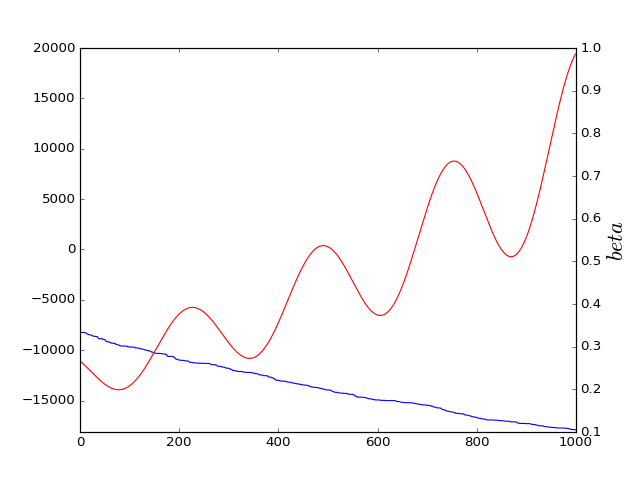

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pot_2)
ax.set_ylim([pot_2[-1]-200,20000])
ax2= ax.twinx()
ax2.plot(beta_2,c='r')
ax2.set_ylabel(r"$beta$",fontsize=20)

In [176]:
dif = pot_2[:-1] - pot_2[1:]

<IPython.core.display.Javascript object>


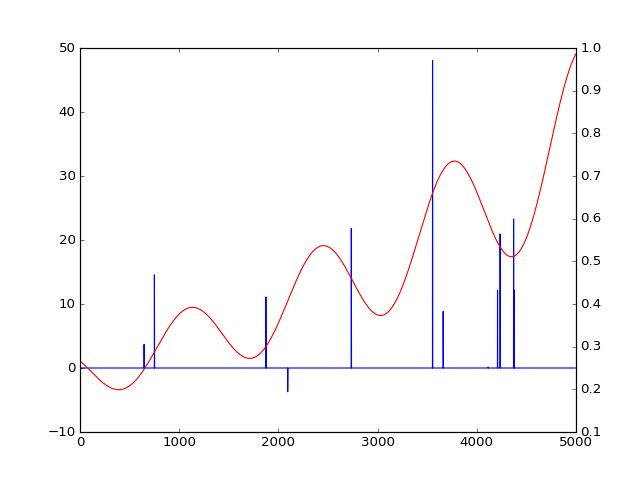

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dif)
#ax.set_ylim([-100,100])
ax2= ax.twinx()
ax2.plot(beta_2,c='r')

In [193]:
sys_conf_64.xyz=traj_2[-1]

In [118]:
def create_system_conf_with_na_and_cl(num_na, num_cl, box_size = 12):
    particles = particlesim.helpers_for_tests.create_positions(box_size=box_size,number_of_particles=num_na+num_cl)
    na = {'sigma':1.21496,'epsilon':0.0469,'charge':1}
    cl = {'sigma':2.02234, 'epsilon':0.15,'charge':-1.0}
    return particlesim.api.SystemConfiguration(xyz=particles, 
                                                      sigmas=([na['sigma']]*num_na)+([cl['sigma']]*num_cl),
                                                      epsilons=[na['epsilon']]*num_na+[cl['epsilon']]*num_cl,
                                                      charges=[na['charge']]*num_na+[cl['charge']]*num_cl,
                                                      box_size=box_size)


In [61]:
sampler2 = particlesim.api.Sampler(sys_conf_64)

In [17]:
beta = [0.01,0.02]

In [18]:
plot("von ", particlesim.utils.)

SyntaxError: invalid syntax (<ipython-input-18-e6c497873289>, line 1)

In [62]:
traj_64,pot_64 = sampler2.metropolis_sa(1000,beta=beta_2)

<IPython.core.display.Javascript object>


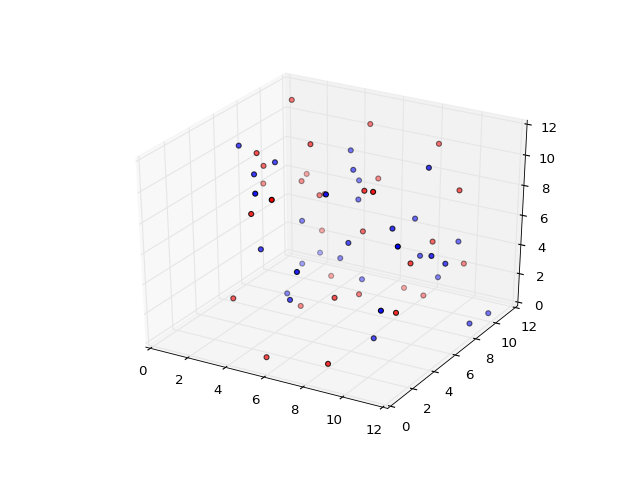

In [63]:
plot_nacl(traj=traj_64,left=0,right=12,num_na=32,traj_sample=-1)

In [64]:
pot_64[-1]

-3839.7622048541662

<IPython.core.display.Javascript object>


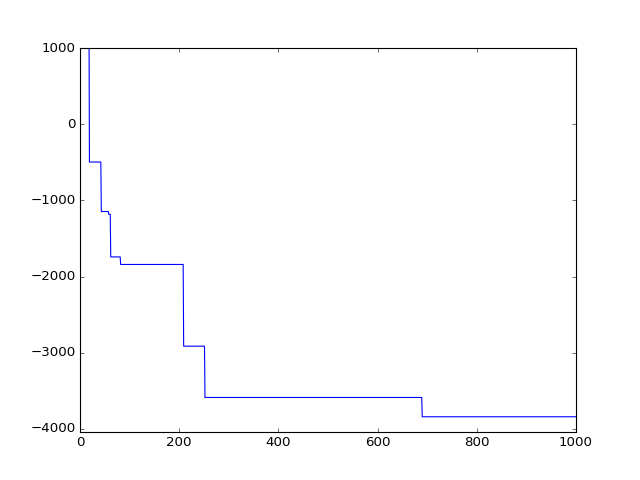

(-4039.7622048541662, 1000)

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pot_64)
ax.set_ylim([pot_64[-1]-200,1000])

In [23]:
dif = pot_64[:-1] - pot_64[1:]

<IPython.core.display.Javascript object>


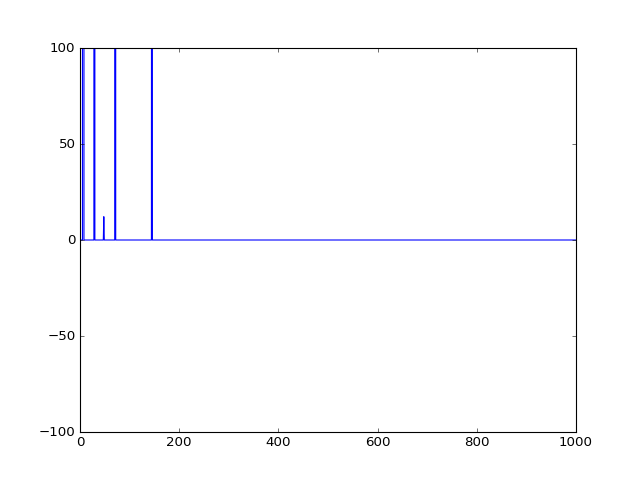

(-100, 100)

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dif)
ax.set_ylim([-100,100])